# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the Dataset

In [3]:
dataFrame=pd.read_csv('netflix_titles_2021.csv') # loading dataset from local library
# quick review of the dataset
dataFrame.tail()

dataFrame.shape # this will give us the RowsxColumns of the dataFrame.
dataFrame.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


#  Data Cleaning
 Check for missing values.
 Drop unnecessary columns or handle missing data as needed.

In [4]:
dataFrame.isna().sum()  # fill give the total null values 
# filling missing values (e.g either fill 'unknown' or 'drop the row')
dataFrame['director']=dataFrame['director'].fillna('unknown')
dataFrame['cast']=dataFrame['cast'].fillna('unknown')
dataFrame['country']=dataFrame['country'].fillna('unknown')
# Drop rows with missing `date_added`
dataFrame = dataFrame.dropna(subset=['date_added'])

dataFrame[['rating','duration']]=dataFrame[['rating','duration']].fillna('unknown')
dataFrame.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Exploratory Data Analysis

C:\Users\anshu\AppData\Local\Temp\ipykernel_14764\2978273412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=dataFrame, palette='Set2')


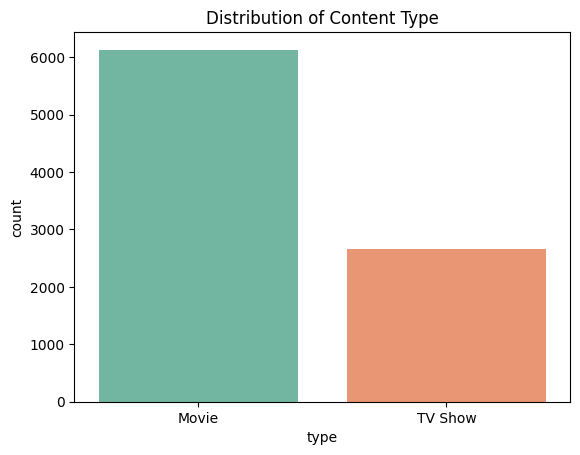

In [5]:
# Count plot for content type
sns.countplot(x='type', data=dataFrame, palette='Set2')
plt.title('Distribution of Content Type')
plt.show()


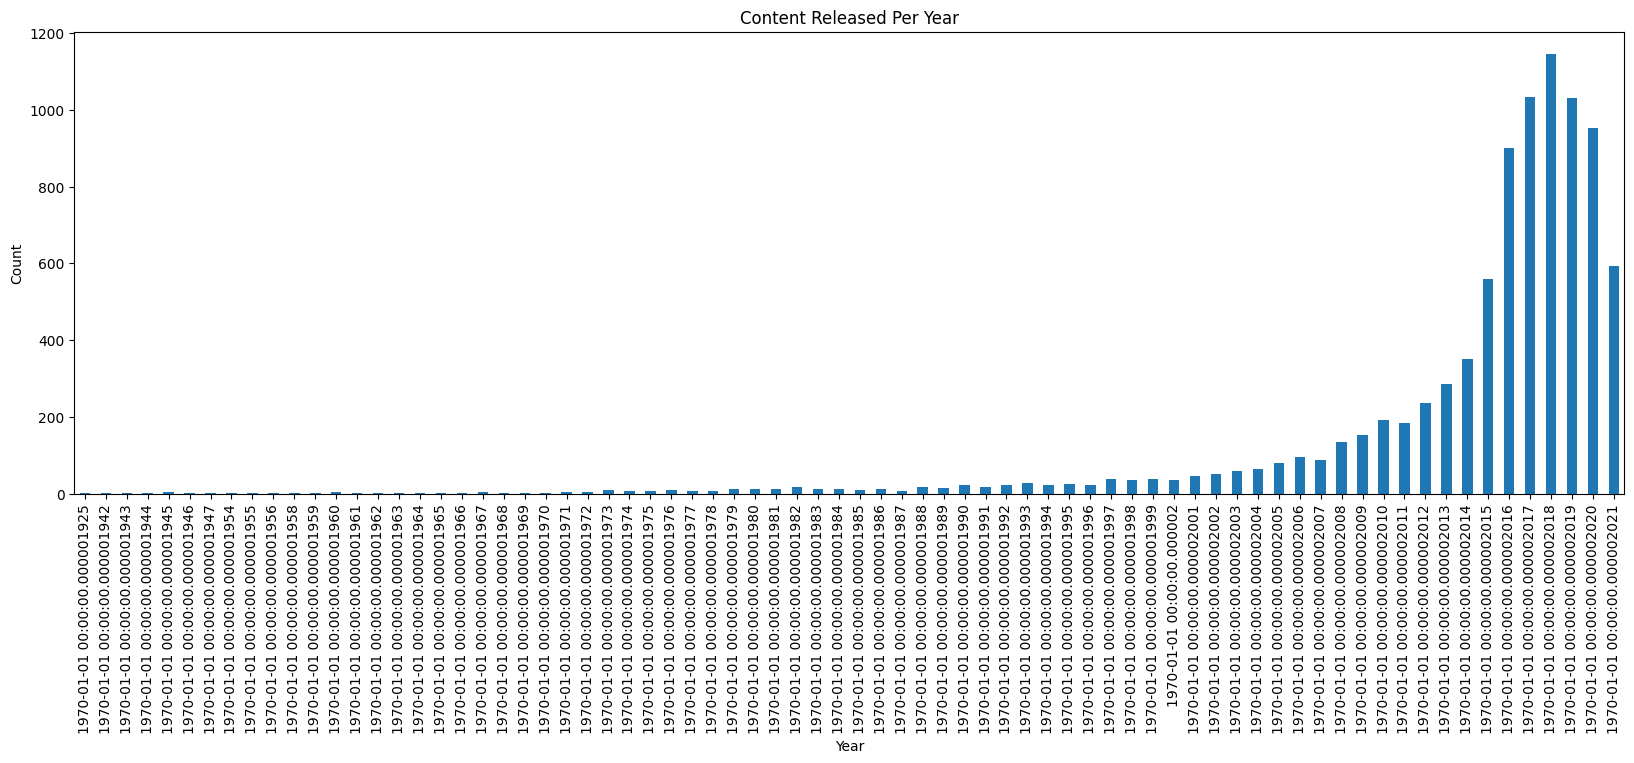

In [6]:
# Extract release years
dataFrame['release_year'] = pd.to_datetime(dataFrame['release_year'], errors='coerce')

# Plot content released per year
dataFrame['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(20, 6))
plt.title('Content Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


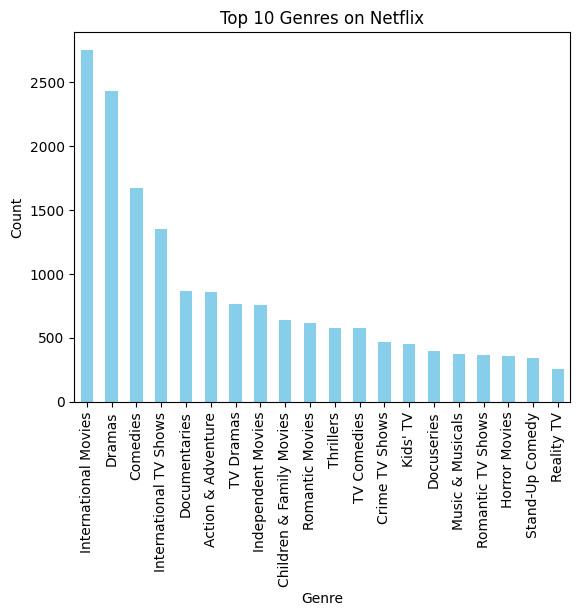

In [7]:
# Split and count genres
genres = dataFrame['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(20)

# Bar plot
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


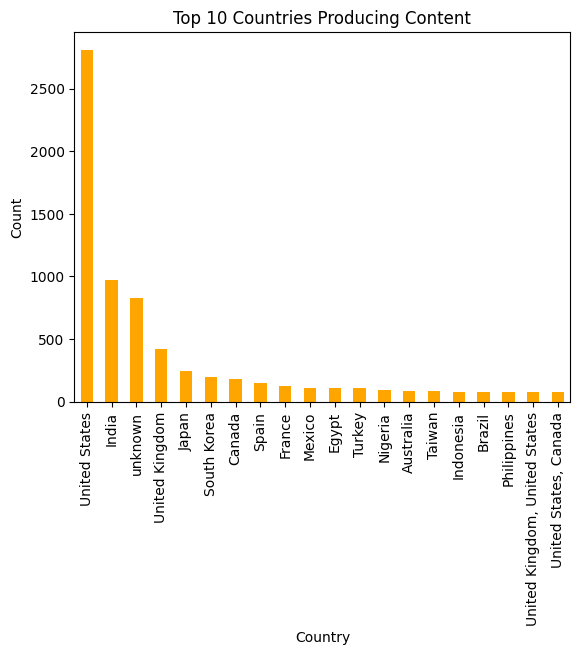

In [8]:
# Top 20 countries producing content
top_countries = dataFrame['country'].value_counts().head(20)

# Plot
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


  date_added date_added_formatted
0 2021-09-25   September 25, 2021
1 2021-09-24   September 24, 2021
2 2021-09-24   September 24, 2021
3 2021-09-24   September 24, 2021
4 2021-09-24   September 24, 2021


C:\Users\anshu\AppData\Local\Temp\ipykernel_14764\3030900111.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_added', data=dataFrame, palette='viridis')


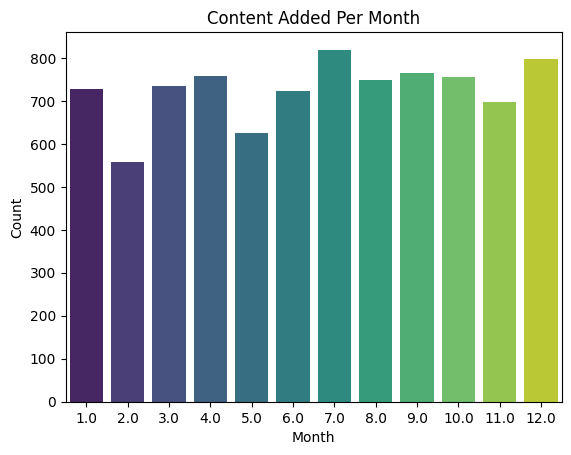

In [9]:
# Extract month from 'date_added'
dataFrame['date_added'] = pd.to_datetime(dataFrame['date_added'],errors='coerce')
# Change the format (e.g., 'Month Day, Year')
dataFrame['date_added_formatted'] = dataFrame['date_added'].dt.strftime('%B %d, %Y')

# Check the result
print(dataFrame[['date_added', 'date_added_formatted']].head())

dataFrame['month_added'] = dataFrame['date_added'].dt.month
# print(dataFrame['date_added'])

# Plot by month
sns.countplot(x='month_added', data=dataFrame, palette='viridis')
plt.title('Content Added Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


In [10]:

# content on the bases of rating 
rating=dataFrame['rating'].unique().tolist()
rating

['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 'unknown',
 'TV-Y7-FV',
 'UR']

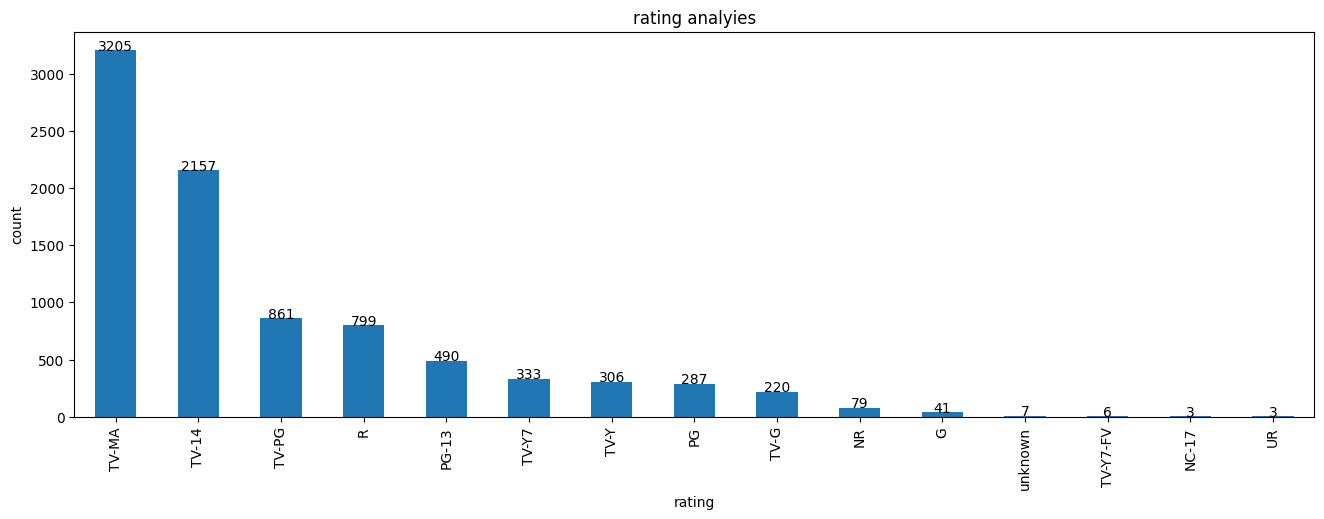

In [11]:
# as we have some noice data in the rating like duration we can remove it 
import re
valid_rating=[x for x in rating if not re.search(r'\d+\s?(min|h)',x)]
valid_rating # how we have the valid ratings.
dataFrame['rating']=dataFrame['rating'].apply(lambda x:x  if x in  valid_rating else np.nan)
dataFrame['rating']=dataFrame['rating'].fillna('unknown')
ax=dataFrame['rating'].value_counts().plot(kind='bar',figsize=(16,5))
for p in ax.patches:  # Loop through each bar
    ax.text(
        p.get_x() + p.get_width() / 2,  # X-coordinate: center of the bar
        p.get_height() + 0.5,           # Y-coordinate: slightly above the bar
        f'{p.get_height():.0f}',        # Text: bar height (formatted as an integer)
        ha='center', fontsize=10, color='black'
    )
plt.xlabel('rating')
plt.ylabel('count')
plt.title('rating analyies')
plt.show()


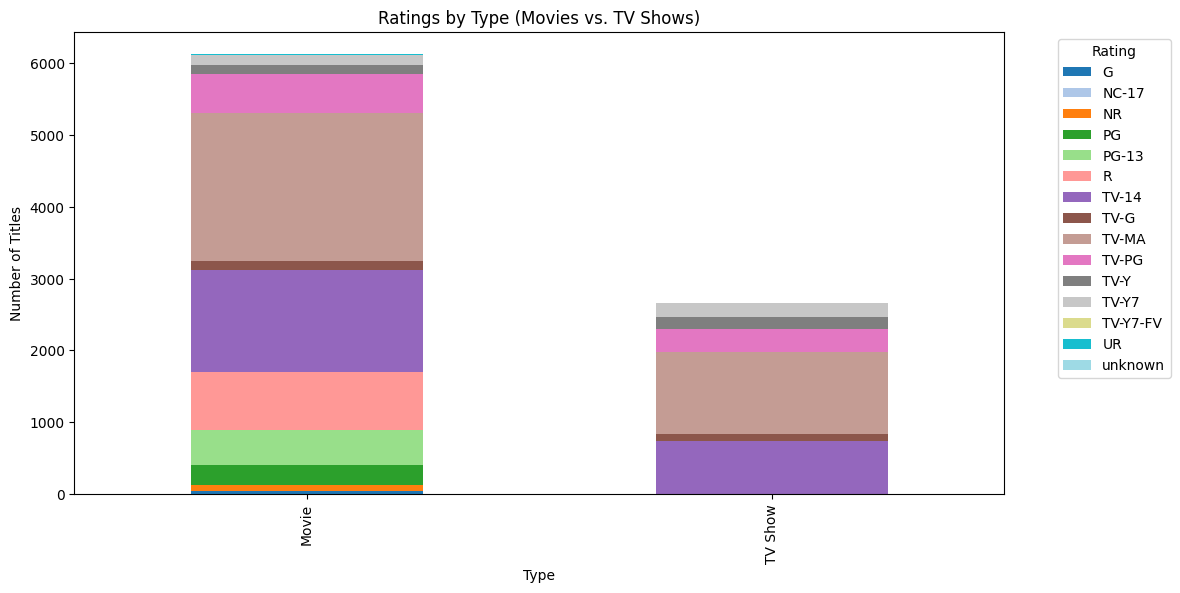

In [16]:
# Group by type and rating
type_rating = dataFrame.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Plot
type_rating.plot(kind='bar', stacked=True ,figsize=(12, 6),colormap='tab20')
plt.title('Ratings by Type (Movies vs. TV Shows)')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
